In [1]:
import tensorflow as tf
import seaborn as sns
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Get the data for the SPY ETF by specifying the stock ticker, start date, and end date
historical_data = yf.download('0005.hk',"2021-10-10","2021-11-09")
historical_data.columns

[*********************100%***********************]  1 of 1 completed


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [3]:
Stocks=["0001.hk","0002.hk","0005.hk","0700.hk",]
data = yf.download("0005.hk", start="2017-01-01", end="2017-04-30")

[*********************100%***********************]  1 of 1 completed


In [4]:
historical_data['Std_dev']= historical_data['Close'].shift(1).rolling(7).std()
historical_data['RSI'] = talib.RSI(historical_data['Close'].values, timeperiod = 5)

In [5]:
moneyflow=pd.read_csv('Tracker Fund Money Flow.csv')
moneyflow['Date']=pd.to_datetime(moneyflow['Date'], format="%d/%m/%Y")
moneyflow.set_index('Date',inplace=True)
moneyflow.sort_index(ascending=True,inplace=True)
moneyflow

,Net Money Flow,5-day SMA,Net Money Flow.1,5-day SMA.1,Net Money Flow.2,5-day SMA.2
Date,,,,,,
2021-10-26,267.79K,-3.40M,459.97M,837.76M,634.83M,1.03B
2021-10-27,7.40M,563.46K,-65.77M,613.55M,84.26M,797.33M
2021-10-28,2.58M,1.40M,41.15M,264.15M,135.00M,410.52M
2021-10-29,14.91M,4.52M,621.47M,278.41M,849.02M,429.10M
2021-11-01,16.02M,8.24M,474.48M,306.26M,702.30M,481.08M
2021-11-02,3.28M,8.84M,519.94M,318.25M,687.65M,491.65M
2021-11-03,15.43M,10.44M,72.58M,345.92M,248.17M,524.43M
2021-11-04,3.51M,10.63M,158.75M,369.44M,325.13M,562.45M
2021-11-05,16.91M,11.03M,457.51M,336.65M,709.20M,534.49M


In [6]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

for column in moneyflow:
    moneyflow[column] = moneyflow[column].apply(value_to_float)
    
moneyflow

,Net Money Flow,5-day SMA,Net Money Flow.1,5-day SMA.1,Net Money Flow.2,5-day SMA.2
Date,,,,,,
2021-10-26,267790.0,-3400000.0,459970000.0,837760000.0,634830000.0,1.030000e+09
2021-10-27,7400000.0,563460.0,-65770000.0,613550000.0,84260000.0,7.973300e+08
2021-10-28,2580000.0,1400000.0,41150000.0,264150000.0,135000000.0,4.105200e+08
2021-10-29,14910000.0,4520000.0,621470000.0,278410000.0,849020000.0,4.291000e+08
2021-11-01,16020000.0,8240000.0,474480000.0,306260000.0,702300000.0,4.810800e+08
2021-11-02,3280000.0,8840000.0,519940000.0,318250000.0,687650000.0,4.916500e+08
2021-11-03,15430000.0,10440000.0,72580000.0,345920000.0,248170000.0,5.244300e+08
2021-11-04,3510000.0,10630000.0,158750000.0,369440000.0,325130000.0,5.624500e+08
2021-11-05,16910000.0,11030000.0,457510000.0,336650000.0,709200000.0,5.344900e+08


In [7]:
df=pd.concat([historical_data,moneyflow],axis=1)
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Std_dev,RSI,Net Money Flow,5-day SMA,Net Money Flow.1,5-day SMA.1,Net Money Flow.2,5-day SMA.2
Date,,,,,,,,,,,,,,
2021-10-26,47.299999,47.500000,47.099998,47.500000,47.500000,31599646.0,0.230940,97.549806,267790.0,-3400000.0,459970000.0,837760000.0,634830000.0,1.030000e+09
2021-10-27,47.549999,48.000000,47.500000,47.849998,47.849998,20701724.0,0.456826,98.058040,7400000.0,563460.0,-65770000.0,613550000.0,84260000.0,7.973300e+08
2021-10-28,47.400002,47.400002,46.500000,47.000000,47.000000,27836706.0,0.633395,60.169837,2580000.0,1400000.0,41150000.0,264150000.0,135000000.0,4.105200e+08
2021-10-29,47.049999,47.150002,46.400002,47.150002,47.150002,18167634.0,0.567681,63.298057,14910000.0,4520000.0,621470000.0,278410000.0,849020000.0,4.291000e+08
2021-11-01,46.549999,47.000000,46.349998,46.950001,46.950001,12419384.0,0.513044,55.971526,16020000.0,8240000.0,474480000.0,306260000.0,702300000.0,4.810800e+08


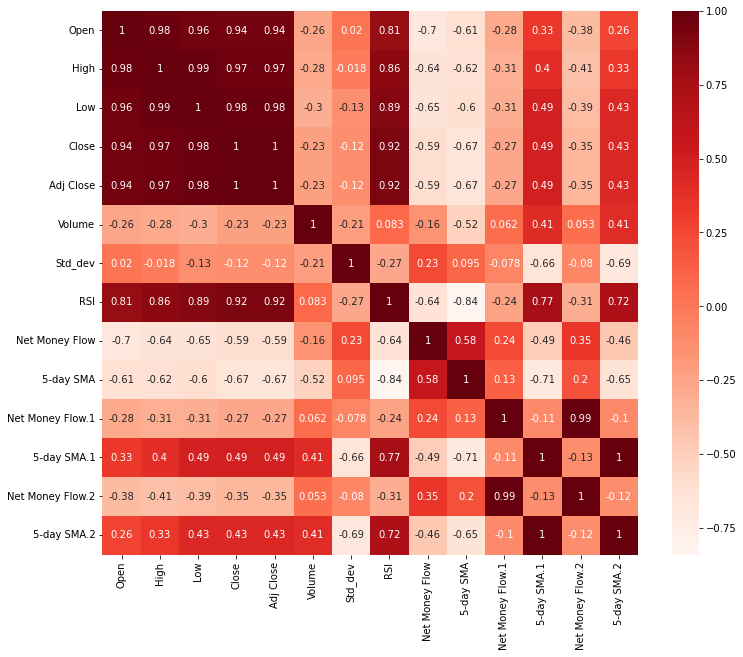

In [8]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
#Correlation with output variable
cor_target = abs(cor["Close"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Open              0.944149
High              0.969175
Low               0.978496
Close             1.000000
Adj Close         1.000000
RSI               0.920087
Net Money Flow    0.590010
5-day SMA         0.665407
Name: Close, dtype: float64

In [34]:
from statistics import mode
def checkCorrelation():
    appearance=list()
    moneyflow=pd.read_csv('Tracker Fund Money Flow.csv')
    moneyflow['Date']=pd.to_datetime(moneyflow['Date'], format="%d/%m/%Y")
    moneyflow.set_index('Date',inplace=True)
    moneyflow.sort_index(ascending=True,inplace=True)
    for column in moneyflow:
        moneyflow[column] = moneyflow[column].apply(value_to_float)
    stocks=["0001.hk","0002.hk","0005.hk","0700.hk","0016.hk","0012.hk","0101.hk","1113.hk","0388.hk","0857.hk",""]
    for stock in stocks:
        data = yf.download(stock)
        data['Std_dev']= data['Close'].shift(1).rolling(7).std()
        data['RSI'] = talib.RSI(data['Close'].values, timeperiod = 5)
        df=pd.concat([data,moneyflow],axis=1)
        df.dropna(inplace=True)
        df.drop(["Open","High","Low","Adj Close"],axis=1,inplace=True)
        cor = df.corr()
        cor_target = abs(cor["Close"])
        #Selecting highly correlated features
        relevant_features = cor_target[cor_target>0.5]
        for ind, val in relevant_features.iteritems():
            if(ind!='Close'):
                appearance.append(ind)
    print(mode(appearance))

In [35]:
checkCorrelation()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
5-day SMA.1
